In [119]:
import numpy as np
import numpy as np
import f21_predict_base as base
import F21DataLoader as dl
import F21Stats as f21stats
import matplotlib.pyplot as plt
import importlib


importlib.reload(base)
importlib.reload(dl)
importlib.reload(f21stats)




<module 'F21Stats' from '/Users/meghapatil/Documents/Sameer/Physics/girish-kulkarni/Code/21cm-forest/code/F21Stats.py'>

In [2]:
def load_dataset(datafiles, psbatchsize=10, ps_bins=None, limitsamplesize=None):
    # Create processor with desired number of worker threads
    processor = dl.F21DataLoader(max_workers=1, psbatchsize=psbatchsize, skip_ps=False, ps_bins=None, limitsamplesize=limitsamplesize, scale_ps=True, use_bispectrum=True)#, limitsamplesize=4)
        
    # Process all files and get results 
    results = processor.process_all_files(datafiles)
        
    # Access results
    all_ks = results['ks']
    all_los = results['los']
    all_freq = results['freq_axis']
    all_ps = results['ps']
    all_params = results['params']
    all_bispec = results['bispectrum']
    all_k_bispec = results['k_bispec']
    """
    print(f"sample ks:{all_ks[0]}")
    print(f"sample ps:{all_ps[0,:]}")
    print(f"sample params:{all_params[0]}")
    print(f"sample los:{all_los[0]}")
    print(f"sample freq:{all_freq}")
    """
    print(f"sample bispectrum:{all_bispec[0]}")
    print(f"sample k_bispec:{all_k_bispec[0]}")
    print(f"\nCombined data shape: {all_los.shape}")
    print(f"Combined parameters shape: {all_params.shape}")
    return (all_params, all_freq, all_los, all_ps, all_ks, all_bispec, all_k_bispec)

def plot(ps_set, ks, psn=None, ksn=None, title=None, labels=None, xscale='log', yscale='log'):
    #print(f"shapes: {ps_set.shape},{ks.shape}")

    base.initplt()
    plt.title(f'{title}')
    print(type(ps_set[0]))
    if isinstance(ps_set[0], np.ndarray):
        for i, ps in enumerate(ps_set):
            if labels is not None: label = labels[i]
            row_ks = None
            if ks is not None:
                if isinstance(ks[0], np.ndarray): row_ks = ks[i]
                else: row_ks = ks
            print(f"Plotting: {row_ks}, {ps}")
            plt.plot(row_ks, ps, label=label, marker='o', alpha=0.2)
    else:
        plt.plot(ks*1e6, ps, label=labels, marker='o')
        #plt.scatter(ks[1:]*1e6, ps[1:], label=label)
    if psn is not None: plt.plot(ksn[0], psn[0], "r--", label='Noise', alpha=0.2)
         
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.xlabel(r'k1 (Hz$^{-1}$)')
    plt.ylabel(r'$B_{21}$')
    plt.legend()
    plt.show()

In [87]:
(paramsn, freqn, losn, psn, ksn, bispecn, kbispecn) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noiseonly_21cmFAST_200Mpc_z6.0_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=1000, limitsamplesize=1000)
(paramssn25_1, freqsn25_1, lossn25_1, pssn25_1, kssn25_1, bispecsn25_1, kbispec25_1) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.25_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=1, limitsamplesize=10)
(paramssn52_2, freqsn52_2, lossn52_2, pssn52_2, kssn52_2, bispecsn52_2, kbispec52_2) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=1, limitsamplesize=10)
(paramssn94_4, freqsn94_4, lossn94_4, pssn94_4, kssn94_4, bispecsn94_4, kbispec94_4) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-4.00_xHI0.94_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=1, limitsamplesize=10)
(paramssomax, freqsomax, lossomax, pssomax, kssomax, bispecsomax, kbispecsomax) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_signalonly_21cmFAST_200Mpc_z6.0_fX-4.00_xHI0.94_8kHz.dat"], psbatchsize=1, limitsamplesize=10)
(paramssn80_1, freqsn80_1, lossn80_1, pssn80_1, kssn80_1, bispecsn80_1, kbispec80_1) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.80_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=1, limitsamplesize=10)
(paramssn52_1, freqsn52_1, lossn52_1, pssn52_1, kssn52_1, bispecsn52_1, kbispec52_1) = load_dataset(["../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI0.52_uGMRT_8kHz_t500h_Smin64.2mJy_alphaR-0.44.dat"], psbatchsize=1, limitsamplesize=10)


sample bispectrum:[[0.99986773 0.99999293 0.99975549 ... 0.99971039 1.00040382 0.99995124]]
sample k_bispec:[3.62056481e-04 7.24112962e-04 1.08616944e-03 ... 4.98913831e-01
 4.99275887e-01 4.99637944e-01]

Combined data shape: (1, 2762)
Combined parameters shape: (1, 2)
sample bispectrum:[[1.01104636 0.99021142 0.99537641 ... 1.00154463 0.99063395 0.99716507]]
sample k_bispec:[3.62056481e-04 7.24112962e-04 1.08616944e-03 ... 4.98913831e-01
 4.99275887e-01 4.99637944e-01]

Combined data shape: (10, 2762)
Combined parameters shape: (10, 2)
sample bispectrum:[[0.99116432 0.98262995 1.0015436  ... 0.996295   0.99478627 1.00596608]]
sample k_bispec:[3.62056481e-04 7.24112962e-04 1.08616944e-03 ... 4.98913831e-01
 4.99275887e-01 4.99637944e-01]

Combined data shape: (10, 2762)
Combined parameters shape: (10, 2)
sample bispectrum:[[0.98180715 0.98034867 0.96468631 ... 1.00531411 1.00107465 0.99799958]]
sample k_bispec:[3.62056481e-04 7.24112962e-04 1.08616944e-03 ... 4.98913831e-01
 4.9927588

## Plot the mean bispectrum of 10 los for few parameter combinations across the parameter space

bispectrum shape(10, 1380)
[3.62056481e-04 7.24112962e-04 1.08616944e-03 ... 4.98913831e-01
 4.99275887e-01 4.99637944e-01]
[2.76200000e+03 1.38100000e+03 9.20666667e+02 ... 2.00435414e+00
 2.00290065e+00 2.00144928e+00]
Calculated 4 Bispectrum: in 0.13694604 seconds
[[9.88344207e+02 9.83560537e+02 9.91033544e+02 ... 9.68166578e+02
  9.68112820e+02 9.70856467e+02]
 [2.22395050e-06 2.48668097e-06 8.29314686e-06 ... 1.17630504e-05
  2.29332186e-05 7.19577180e-05]
 [1.04017354e-05 5.82733199e-05 1.86184664e-05 ... 2.28191539e-06
  4.62518108e-07 2.15486855e-05]
 ...
 [2.51229267e-06 7.26746228e-06 1.13705768e-05 ... 7.69848434e-05
  2.85158220e-05 2.16077248e-05]
 [1.04017354e-05 5.82733199e-05 1.86184664e-05 ... 2.28191539e-06
  4.62518108e-07 2.15486855e-05]
 [2.22395050e-06 2.48668097e-06 8.29314686e-06 ... 1.17630504e-05
  2.29332186e-05 7.19577180e-05]]


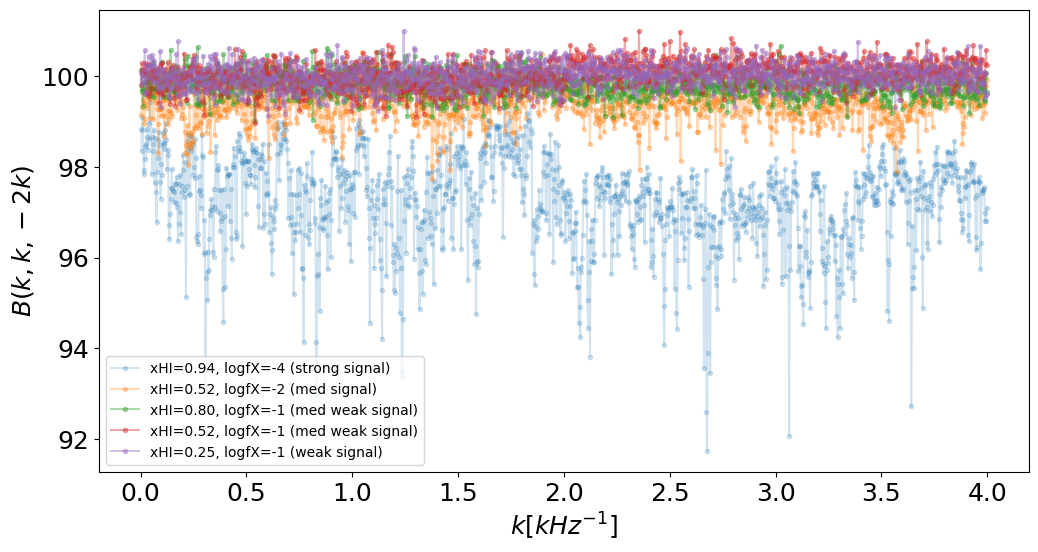

In [114]:
weak_signal = lossn25_1[:10]# np.random.rand(2762)+1.0]
med_signal = lossn52_2[:10]# np.random.rand(2762)+1.0]
med_weak_signal = lossn52_1[:10]# np.random.rand(2762)+1.0]
str_weak_signal = lossn80_1[:10]# np.random.rand(2762)+1.0]
str_signal = lossn94_4[:10]
noise = losn[:10]
#print(f"{weak_signal.shape}")
k_weak, b_weak = f21stats.F21Stats.compute_1d_bispectrum(weak_signal)
print(f"bispectrum shape{b_weak.shape}")
print(f"{k_weak}")
print(f"{1.0/k_weak}")

import time
start_time = time.perf_counter() 
                        
k_med, b_med = f21stats.F21Stats.compute_1d_bispectrum(med_signal)
k_med_weak, b_med_weak = f21stats.F21Stats.compute_1d_bispectrum(med_weak_signal)
k_str_weak, b_str_weak = f21stats.F21Stats.compute_1d_bispectrum(str_weak_signal)
k_str, b_str = f21stats.F21Stats.compute_1d_bispectrum(str_signal)
k_weak, b_weak = f21stats.F21Stats.compute_1d_bispectrum(weak_signal)
k_noise, b_noise = f21stats.F21Stats.compute_1d_bispectrum(noise)
end_time = time.perf_counter() 
print(f"Calculated 4 Bispectrum: in {end_time - start_time:.8f} seconds")
print(f"{b_str}")

#kbispecn, bispecn = f21stats.F21Stats.compute_1d_bispectrum(losn[0])
#plot([b_weak] ,[k_fake], bispecn, kbispecn, title="Bi-spectra", labels=['fake', 'noise'])
base.initplt()
plt.plot(k_str*8, np.mean(b_str, axis=0), marker='.', alpha=0.2, label='xHI=0.94, logfX=-4 (strong signal)')
plt.plot(k_med*8, np.mean(b_med, axis=0), marker='.', alpha=0.3, label='xHI=0.52, logfX=-2 (med signal)')
plt.plot(k_str_weak*8, np.mean(b_str_weak, axis=0), marker='.', alpha=0.4, label='xHI=0.80, logfX=-1 (med weak signal)')
plt.plot(k_med_weak*8, np.mean(b_med_weak, axis=0), marker='.', alpha=0.4, label='xHI=0.52, logfX=-1 (med weak signal)')
plt.plot(k_weak*8, np.mean(b_weak, axis=0), marker='.', alpha=0.4, label='xHI=0.25, logfX=-1 (weak signal)')
#plt.plot(k_noise*8, np.mean(b_noise, axis=0), marker='.', alpha=0.4, label='noise')
#plt.plot(k_str*8, bispecn[0,0], marker='.', alpha=0.5, label='noise')
#plt.yscale('log')
plt.ylabel(r'$B(k,k,-2k)$')
plt.xlabel(r'$k [kHz^{-1}]$')
#plt.xscale('log')
plt.legend(fontsize=10)
plt.show()

## Take a sum of 10 los (for each point) and then calculate bispectrum on the sum

bispectrum shape(10, 1380)
[3.62056481e-04 7.24112962e-04 1.08616944e-03 ... 4.98913831e-01
 4.99275887e-01 4.99637944e-01]
[2.76200000e+03 1.38100000e+03 9.20666667e+02 ... 2.00435414e+00
 2.00290065e+00 2.00144928e+00]
Calculated 4 Bispectrum: in 0.09117592 seconds
[[988.34421304 983.56073765 991.03348439 ... 968.16655488 968.1128553
  970.85642032]]


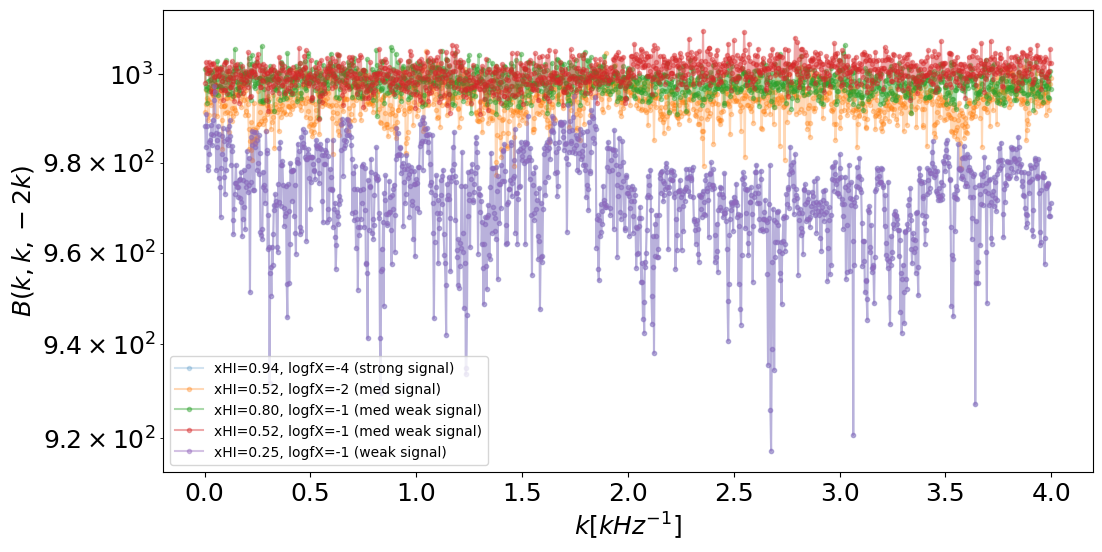

In [105]:
weak_signal = lossn25_1[:10]# np.random.rand(2762)+1.0]
med_signal = lossn52_2[:10]# np.random.rand(2762)+1.0]
med_weak_signal = lossn52_1[:10]# np.random.rand(2762)+1.0]
str_weak_signal = lossn80_1[:10]# np.random.rand(2762)+1.0]
str_signal = lossn94_4[:10]
#print(f"{weak_signal.shape}")
k_weak, b_weak = f21stats.F21Stats.compute_1d_bispectrum(weak_signal)
print(f"bispectrum shape{b_weak.shape}")
print(f"{k_weak}")
print(f"{1.0/k_weak}")

import time
start_time = time.perf_counter() 
                        
k_med, b_med = f21stats.F21Stats.compute_1d_bispectrum_single(np.sum(med_signal, axis=0))
k_med_weak, b_med_weak = f21stats.F21Stats.compute_1d_bispectrum_single(np.sum(med_weak_signal, axis=0))
k_str_weak, b_str_weak = f21stats.F21Stats.compute_1d_bispectrum_single(np.sum(str_weak_signal, axis=0))
k_weak, b_weak = f21stats.F21Stats.compute_1d_bispectrum_single(np.sum(str_signal, axis=0))
k_str, b_str = f21stats.F21Stats.compute_1d_bispectrum_single(np.sum(str_signal, axis=0))
end_time = time.perf_counter() 
print(f"Calculated 4 Bispectrum: in {end_time - start_time:.8f} seconds")
print(f"{b_str}")

#kbispecn, bispecn = f21stats.F21Stats.compute_1d_bispectrum(losn[0])
#plot([b_weak] ,[k_fake], bispecn, kbispecn, title="Bi-spectra", labels=['fake', 'noise'])
base.initplt()
plt.plot(k_str*8, np.mean(b_str, axis=0), marker='.', alpha=0.2, label='xHI=0.94, logfX=-4 (strong signal)')
plt.plot(k_med*8, np.mean(b_med, axis=0), marker='.', alpha=0.3, label='xHI=0.52, logfX=-2 (med signal)')
plt.plot(k_str_weak*8, np.mean(b_str_weak, axis=0), marker='.', alpha=0.4, label='xHI=0.80, logfX=-1 (med weak signal)')
plt.plot(k_med_weak*8, np.mean(b_med_weak, axis=0), marker='.', alpha=0.4, label='xHI=0.52, logfX=-1 (med weak signal)')
plt.plot(k_weak*8, np.mean(b_weak, axis=0), marker='.', alpha=0.4, label='xHI=0.25, logfX=-1 (weak signal)')
#plt.plot(k_str*8, bispecn[0,0], marker='.', alpha=0.5, label='noise')
plt.yscale('log')
plt.ylabel(r'$B(k,k,-2k)$')
plt.xlabel(r'$k [kHz^{-1}]$')
#plt.xscale('log')
plt.legend(fontsize=10)
plt.show()

## Take the minimum of 10 los (for each point) and then calculate bispectrum on the min

bispectrum shape(10, 1380)
[3.62056481e-04 7.24112962e-04 1.08616944e-03 ... 4.98913831e-01
 4.99275887e-01 4.99637944e-01]
[2.76200000e+03 1.38100000e+03 9.20666667e+02 ... 2.00435414e+00
 2.00290065e+00 2.00144928e+00]
Calculated 5 Bispectrum: in 0.09013133 seconds
[[0.95319011 0.94971574 0.93638245 ... 0.89662577 0.89815583 0.89962907]]


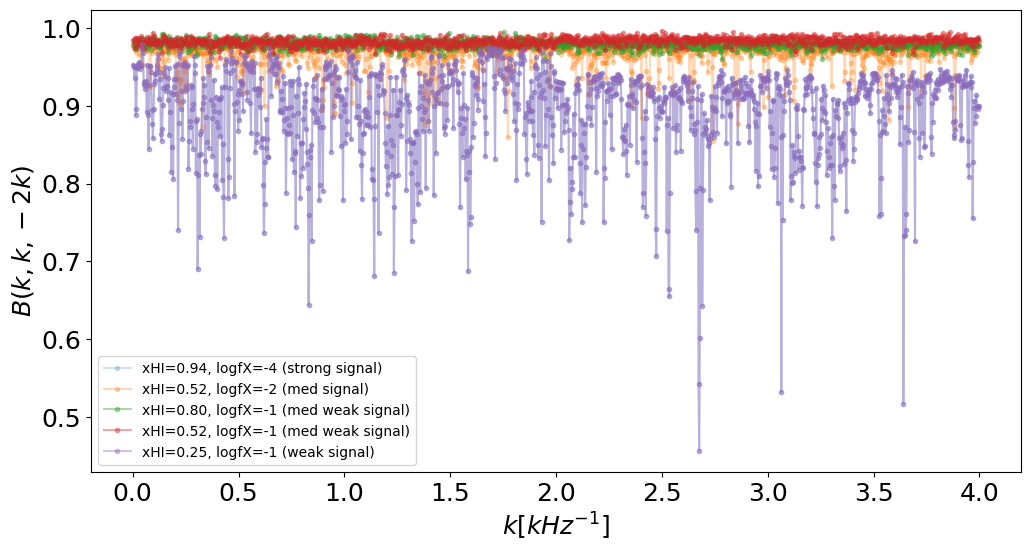

In [107]:
weak_signal = lossn25_1[:10]# np.random.rand(2762)+1.0]
med_signal = lossn52_2[:10]# np.random.rand(2762)+1.0]
med_weak_signal = lossn52_1[:10]# np.random.rand(2762)+1.0]
str_weak_signal = lossn80_1[:10]# np.random.rand(2762)+1.0]
str_signal = lossn94_4[:10]
#print(f"{weak_signal.shape}")
k_weak, b_weak = f21stats.F21Stats.compute_1d_bispectrum(weak_signal)
print(f"bispectrum shape{b_weak.shape}")
print(f"{k_weak}")
print(f"{1.0/k_weak}")

import time
start_time = time.perf_counter() 
                        
k_med, b_med = f21stats.F21Stats.compute_1d_bispectrum_single(np.min(med_signal, axis=0))
k_med_weak, b_med_weak = f21stats.F21Stats.compute_1d_bispectrum_single(np.min(med_weak_signal, axis=0))
k_str_weak, b_str_weak = f21stats.F21Stats.compute_1d_bispectrum_single(np.min(str_weak_signal, axis=0))
k_weak, b_weak = f21stats.F21Stats.compute_1d_bispectrum_single(np.min(str_signal, axis=0))
k_str, b_str = f21stats.F21Stats.compute_1d_bispectrum_single(np.min(str_signal, axis=0))
end_time = time.perf_counter() 
print(f"Calculated 5 Bispectrum: in {end_time - start_time:.8f} seconds")
print(f"{b_str}")

#kbispecn, bispecn = f21stats.F21Stats.compute_1d_bispectrum(losn[0])
#plot([b_weak] ,[k_fake], bispecn, kbispecn, title="Bi-spectra", labels=['fake', 'noise'])
base.initplt()
plt.plot(k_str*8, np.mean(b_str, axis=0), marker='.', alpha=0.2, label='xHI=0.94, logfX=-4 (strong signal)')
plt.plot(k_med*8, np.mean(b_med, axis=0), marker='.', alpha=0.3, label='xHI=0.52, logfX=-2 (med signal)')
plt.plot(k_str_weak*8, np.mean(b_str_weak, axis=0), marker='.', alpha=0.4, label='xHI=0.80, logfX=-1 (med weak signal)')
plt.plot(k_med_weak*8, np.mean(b_med_weak, axis=0), marker='.', alpha=0.4, label='xHI=0.52, logfX=-1 (med weak signal)')
plt.plot(k_weak*8, np.mean(b_weak, axis=0), marker='.', alpha=0.4, label='xHI=0.25, logfX=-1 (weak signal)')
#plt.plot(k_str*8, bispecn[0,0], marker='.', alpha=0.5, label='noise')
#plt.yscale('log')
plt.ylabel(r'$B(k,k,-2k)$')
plt.xlabel(r'$k [kHz^{-1}]$')
#plt.xscale('log')

plt.legend(fontsize=10)
plt.show()

## Plot binned bispectrum

bispectrum shape(10, 1380)
[3.62056481e-04 7.24112962e-04 1.08616944e-03 ... 4.98913831e-01
 4.99275887e-01 4.99637944e-01]
[2.76200000e+03 1.38100000e+03 9.20666667e+02 ... 2.00435414e+00
 2.00290065e+00 2.00144928e+00]
Calculated 4 Bispectrum: in 0.17211433 seconds
[[9.80317985e+02 9.71576390e+02 9.77629295e+02 9.73376092e+02
  9.71988500e+02 9.73682853e+02 9.67582825e+02 9.74234098e+02
  9.83695040e+02 9.75684664e+02 9.66609654e+02 9.71854225e+02
  9.67354233e+02 9.66282638e+02 9.69653190e+02 9.67503772e+02
  9.63856869e+02 9.74804021e+02 9.72257955e+02 9.75099743e+02]
 [1.45166169e-05 3.12201250e-05 3.32825910e-05 4.25175152e-05
  5.95097178e-05 4.39541902e-05 5.01216713e-05 5.12379208e-05
  7.00450040e-06 2.33825595e-05 1.54186935e-04 6.66261090e-05
  8.40483472e-05 3.08494788e-04 5.18526099e-05 9.43247896e-05
  1.28956867e-04 7.02134492e-05 1.22155209e-04 5.57056962e-05]
 [1.54379932e-05 3.54898555e-05 3.11339442e-05 4.40640479e-05
  4.67476708e-05 3.28456741e-05 7.25238569e-05 4

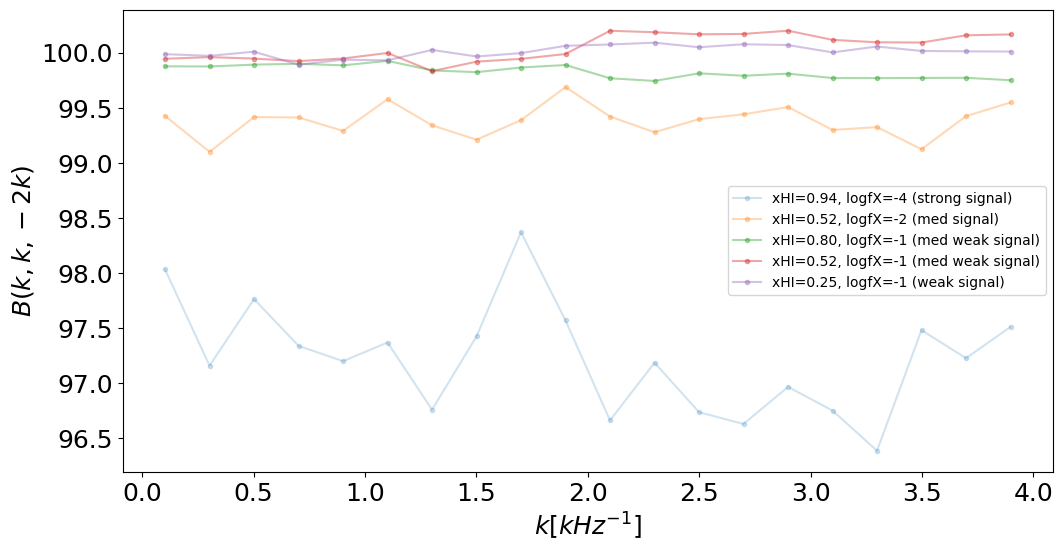

In [117]:
from scipy.stats import binned_statistic
def bin(tup):
    k, b = tup
    b_bin, k_bin_edges, _ = binned_statistic(k, b, statistic='mean', bins=20)
    k_bin = 0.5 *(k_bin_edges[:-1] + k_bin_edges[1:])
    return k_bin, b_bin

weak_signal = lossn25_1[:10]# np.random.rand(2762)+1.0]
med_signal = lossn52_2[:10]# np.random.rand(2762)+1.0]
med_weak_signal = lossn52_1[:10]# np.random.rand(2762)+1.0]
str_weak_signal = lossn80_1[:10]# np.random.rand(2762)+1.0]
str_signal = lossn94_4[:10]
#print(f"{weak_signal.shape}")
k_weak, b_weak = f21stats.F21Stats.compute_1d_bispectrum(weak_signal)
print(f"bispectrum shape{b_weak.shape}")
print(f"{k_weak}")
print(f"{1.0/k_weak}")

import time
start_time = time.perf_counter() 
                        
k_med, b_med = bin(f21stats.F21Stats.compute_1d_bispectrum_torch(med_signal))
k_med_weak, b_med_weak = bin(f21stats.F21Stats.compute_1d_bispectrum(med_weak_signal))
k_str_weak, b_str_weak = bin(f21stats.F21Stats.compute_1d_bispectrum(str_weak_signal))
k_str, b_str = bin(f21stats.F21Stats.compute_1d_bispectrum(str_signal))
k_weak, b_weak = bin(f21stats.F21Stats.compute_1d_bispectrum(weak_signal))
end_time = time.perf_counter() 
print(f"Calculated 4 Bispectrum: in {end_time - start_time:.8f} seconds")
print(f"{b_str}")


#kbispecn, bispecn = f21stats.F21Stats.compute_1d_bispectrum(losn[0])
#plot([b_weak] ,[k_fake], bispecn, kbispecn, title="Bi-spectra", labels=['fake', 'noise'])
base.initplt()
plt.plot(k_str*8, np.mean(b_str, axis=0), marker='.', alpha=0.2, label='xHI=0.94, logfX=-4 (strong signal)')
plt.plot(k_med*8, np.mean(b_med, axis=0), marker='.', alpha=0.3, label='xHI=0.52, logfX=-2 (med signal)')
plt.plot(k_str_weak*8, np.mean(b_str_weak, axis=0), marker='.', alpha=0.4, label='xHI=0.80, logfX=-1 (med weak signal)')
plt.plot(k_med_weak*8, np.mean(b_med_weak, axis=0), marker='.', alpha=0.4, label='xHI=0.52, logfX=-1 (med weak signal)')
plt.plot(k_weak*8, np.mean(b_weak, axis=0), marker='.', alpha=0.4, label='xHI=0.25, logfX=-1 (weak signal)')
#plt.plot(k_str*8, bispecn[0,0], marker='.', alpha=0.5, label='noise')
#plt.yscale('log')
plt.ylabel(r'$B(k,k,-2k)$')
plt.xlabel(r'$k [kHz^{-1}]$')
#plt.xscale('log')
plt.legend(fontsize=10)
plt.show()



## Plot bispectrum for same logfx value for different xHI

files to load: 21
sample bispectrum:[ 99.98273865 100.03440347 100.00144518  99.97771079  99.99406645
  99.95426254 100.02373659 100.05778292  99.95894403  99.98020899
  99.71437498  99.78355627  99.74534007  99.74216601  99.7265251
  99.78936162  99.78607608  99.80277185  99.80326244  99.76173431]
sample k_bispec:[0.01284395 0.03780775 0.06277154 0.08773534 0.11269913 0.13766293
 0.16262672 0.18759051 0.21255431 0.2375181  0.2624819  0.28744569
 0.31240949 0.33737328 0.36233707 0.38730087 0.41226466 0.43722846
 0.46219225 0.48715605]

Combined data shape: (21, 2762)
Combined parameters shape: (21, 2)
loaded dataset: (21, 2)


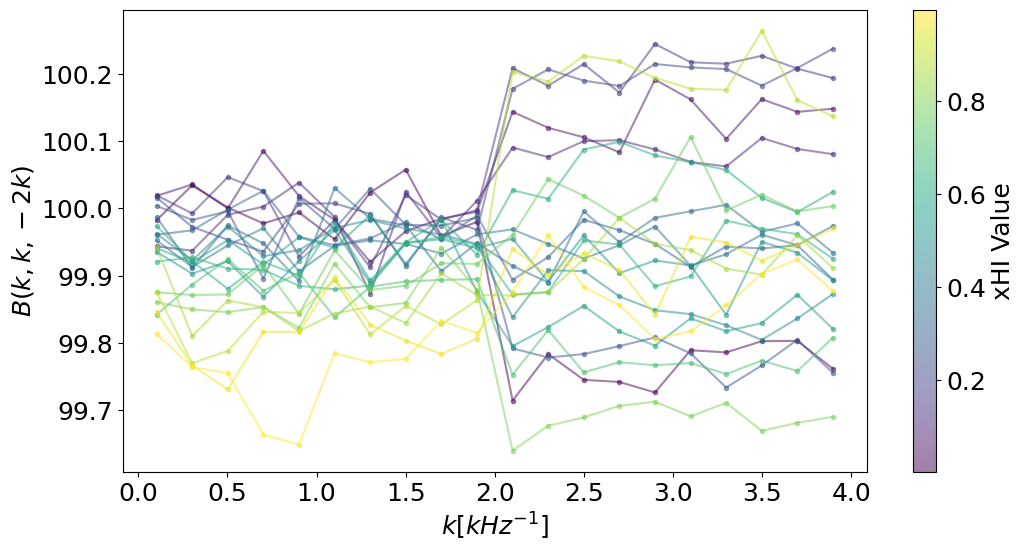

In [128]:
import glob
import matplotlib.cm as cm
import matplotlib.pyplot as plt

files10sn=glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-1.00_xHI*_uGMRT_8kHz_t500h*.dat")
files10sn = sorted(files10sn)
print(f"files to load: {len(files10sn)}")

params10sn, freq10sn, los10sn, ps10sn, ks10sn, bispec10sn, kbispec10sn = load_dataset(files10sn, psbatchsize=10, limitsamplesize=10, ps_bins=20)

print(f"loaded dataset: {params10sn.shape}")
base.initplt()

norm = plt.Normalize(params10sn[:, 0].min(), params10sn[:, 0].max())
cmap = cm.viridis  # You can choose any colormap you like

sc = plt.scatter([], [], c=[], cmap=cmap, norm=norm, alpha=0.5)  # Empty scatter for colorbar
for i, bispec in enumerate(bispec10sn):
    color = cmap(norm(params10sn[i, 0]))  # Get color based on params10sn[i,0]
    plt.plot(kbispec10sn[0]*8, bispec, marker='.', alpha=0.5, color=color, label=f'xHI={params10sn[i,0]:.2f}, logfX={params10sn[i,1]:.2f}')

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('xHI Value')  # Label for the colorbar

#plt.yscale('log')
plt.ylabel(r'$B(k,k,-2k)$')
plt.xlabel(r'$k [kHz^{-1}]$')
#plt.xscale('log')
#plt.legend(fontsize=10)
plt.show()


files to load: 21
sample bispectrum:[100.03720873  99.9241125   99.99360062  99.98344108  99.97028069
 100.03176216 100.03418446  99.98421356 100.01442513  99.99740206
 100.07158907 100.03671664 100.0288528  100.0398064  100.01508037
 100.04475319 100.08390738 100.0185226   99.97308926 100.03968135]
sample k_bispec:[0.01284395 0.03780775 0.06277154 0.08773534 0.11269913 0.13766293
 0.16262672 0.18759051 0.21255431 0.2375181  0.2624819  0.28744569
 0.31240949 0.33737328 0.36233707 0.38730087 0.41226466 0.43722846
 0.46219225 0.48715605]

Combined data shape: (21, 2762)
Combined parameters shape: (21, 2)
loaded dataset: (21, 2)


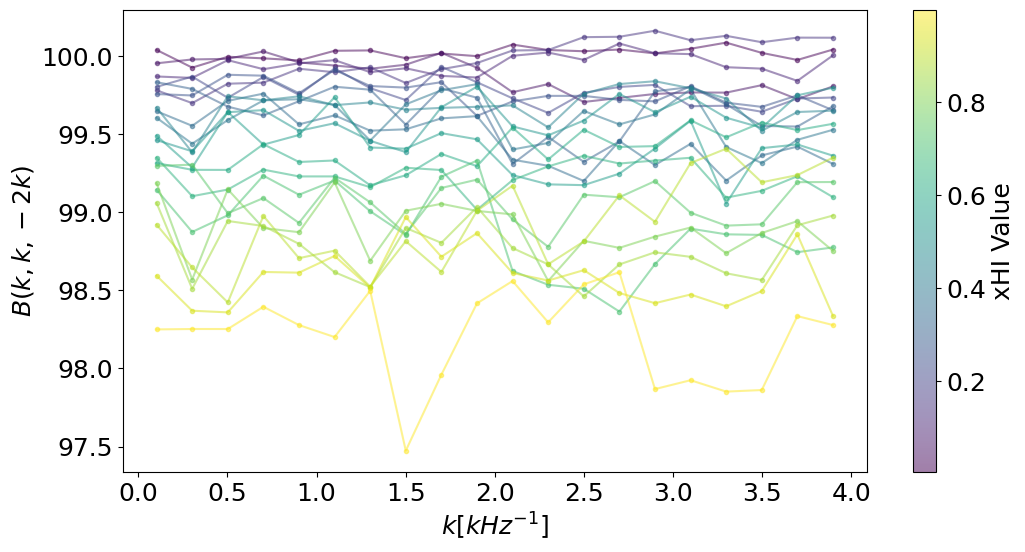

In [129]:
import glob
import matplotlib.cm as cm
import matplotlib.pyplot as plt

files10sn=glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX-2.00_xHI*_uGMRT_8kHz_t500h*.dat")
files10sn = sorted(files10sn)
print(f"files to load: {len(files10sn)}")

params10sn, freq10sn, los10sn, ps10sn, ks10sn, bispec10sn, kbispec10sn = load_dataset(files10sn, psbatchsize=10, limitsamplesize=10, ps_bins=20)

print(f"loaded dataset: {params10sn.shape}")
base.initplt()

norm = plt.Normalize(params10sn[:, 0].min(), params10sn[:, 0].max())
cmap = cm.viridis  # You can choose any colormap you like

sc = plt.scatter([], [], c=[], cmap=cmap, norm=norm, alpha=0.5)  # Empty scatter for colorbar
for i, bispec in enumerate(bispec10sn):
    color = cmap(norm(params10sn[i, 0]))  # Get color based on params10sn[i,0]
    plt.plot(kbispec10sn[0]*8, bispec, marker='.', alpha=0.5, color=color, label=f'xHI={params10sn[i,0]:.2f}, logfX={params10sn[i,1]:.2f}')

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('xHI Value')  # Label for the colorbar

#plt.yscale('log')
plt.ylabel(r'$B(k,k,-2k)$')
plt.xlabel(r'$k [kHz^{-1}]$')
#plt.xscale('log')
#plt.legend(fontsize=10)
plt.show()


## plot bispectra for the same xHI but different logfx values

files to load: 19
sample bispectrum:[ 99.99378021  99.9811556  100.01049288  99.98899822 100.02515924
  99.9315594   99.97567553  99.96219747 100.00136437 100.07676518
  99.89224327  99.86966096  99.87708737  99.97181497  99.90951289
  99.9111826   99.88035612  99.87726875  99.909972    99.90526176]
sample k_bispec:[0.01284395 0.03780775 0.06277154 0.08773534 0.11269913 0.13766293
 0.16262672 0.18759051 0.21255431 0.2375181  0.2624819  0.28744569
 0.31240949 0.33737328 0.36233707 0.38730087 0.41226466 0.43722846
 0.46219225 0.48715605]

Combined data shape: (19, 2762)
Combined parameters shape: (19, 2)
loaded dataset: (19, 2)


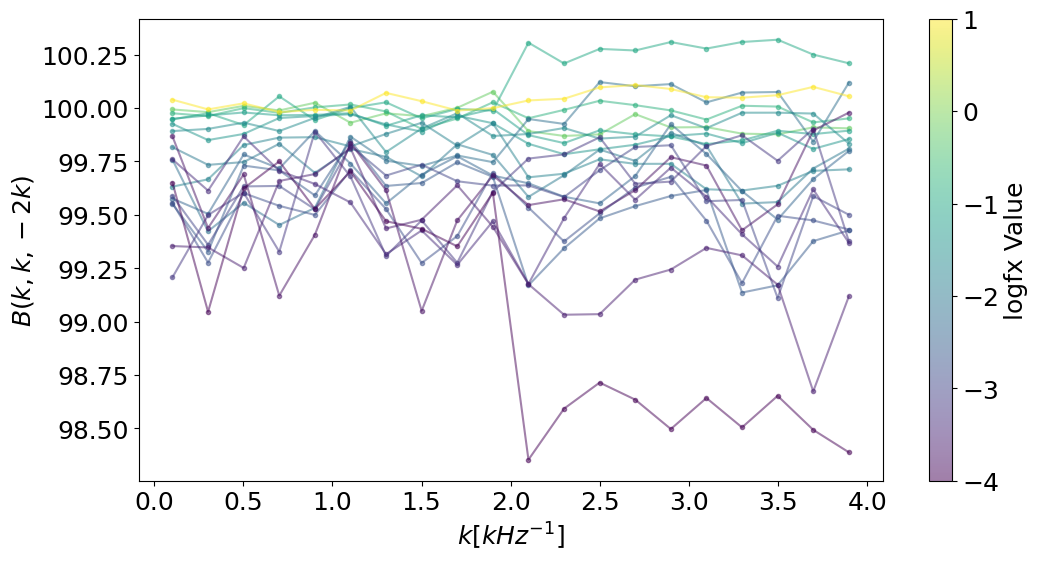

In [130]:
import glob
import matplotlib.cm as cm
import matplotlib.pyplot as plt

files10sn=glob.glob("../data/21cmFAST_los/F21_noisy/F21_noisy_21cmFAST_200Mpc_z6.0_fX*_xHI0.25_uGMRT_8kHz_t500h*.dat")
files10sn = sorted(files10sn)
print(f"files to load: {len(files10sn)}")

params10sn, freq10sn, los10sn, ps10sn, ks10sn, bispec10sn, kbispec10sn = load_dataset(files10sn, psbatchsize=10, limitsamplesize=10, ps_bins=20)

print(f"loaded dataset: {params10sn.shape}")
base.initplt()

norm = plt.Normalize(params10sn[:, 1].min(), params10sn[:, 1].max())
cmap = cm.viridis  # You can choose any colormap you like

sc = plt.scatter([], [], c=[], cmap=cmap, norm=norm, alpha=0.5)  # Empty scatter for colorbar
for i, bispec in enumerate(bispec10sn):
    color = cmap(norm(params10sn[i, 1]))  # Get color based on params10sn[i,0]
    plt.plot(kbispec10sn[0]*8, bispec, marker='.', alpha=0.5, color=color, label=f'xHI={params10sn[i,0]:.2f}, logfX={params10sn[i,1]:.2f}')

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('logfx Value')  # Label for the colorbar

#plt.yscale('log')
plt.ylabel(r'$B(k,k,-2k)$')
plt.xlabel(r'$k [kHz^{-1}]$')
#plt.xscale('log')
#plt.legend(fontsize=10)
plt.show()
